<a href="https://colab.research.google.com/github/Narachii/tensorflow_basics/blob/sequence_model/SimpleRnn_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

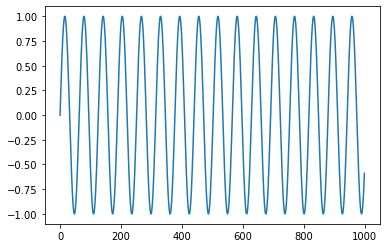

In [2]:
# make the original data
series = np.sin(0.1*np.arange(1000)) #+ np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [3]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print('X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (990, 10, 1) Y.shape (990,)


In [6]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(15)(i) #default activation: tanh
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.001),
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
16/16 [==============================] - 0s 16ms/step - loss: 2.2131 - val_loss: 1.3868
Epoch 2/80
16/16 [==============================] - 0s 5ms/step - loss: 0.9478 - val_loss: 0.6423
Epoch 3/80
16/16 [==============================] - 0s 5ms/step - loss: 0.4863 - val_loss: 0.3661
Epoch 4/80
16/16 [==============================] - 0s 5ms/step - loss: 0.2893 - val_loss: 0.2231
Epoch 5/80
16/16 [==============================] - 0s 5ms/step - loss: 0.1750 - val_loss: 0.1347
Epoch 6/80
16/16 [==============================] - 0s 5ms/step - loss: 0.1056 - val_loss: 0.0789
Epoch 7/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0627 - val_loss: 0.0479
Epoch 8/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0402 - val_loss: 0.0330
Epoch 9/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0298 - val_loss: 0.0265
Epoch 10/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0254 - val_loss: 0.0237
Epoch 11/80
16/16 

In [0]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

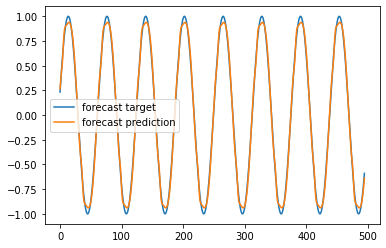

In [8]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [0]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

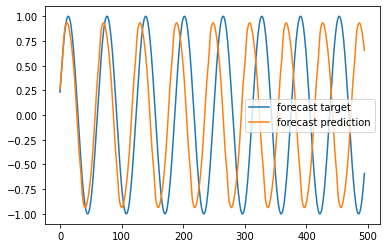

In [10]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()